# Multiple Linear Regression / Neural Network to Predict Medical Insurance Premium

Objective of this notebook is to find the health insurance cost incured by Individuals based on thier age, gender, BMI, number of children, smoking habit and geo-location.

Features available are:
sex: insurance contractor gender, female, male
bmi: Body mass index (ideally 18.5 to 24.9)
children: Number of children covered by health insurance / Number of dependents
smoker: smoking habits
region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
charges: Individual medical costs billed by health insurance

## 1.Importing necessary Libraries


In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
# read the csv file 
insurance_df = pd.read_csv('insurance.csv')

## 2. Performing Exploratory data analysis and Visualization

In [7]:
# checking for Null Values
insurance_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
# Grouping by region to see any relationship between region and charges
df_region = insurance_df.groupby(by='region').mean()
df_region

,age,bmi,children,charges
region,,,,
northeast,39.268519,29.173503,1.046296,13406.384516
northwest,39.196923,29.199785,1.147692,12417.575374
southeast,38.939560,33.355989,1.049451,14735.411438
southwest,39.455385,30.596615,1.141538,12346.937377


In [10]:
# Grouping by age to see any relationship between region and charges
df_age = insurance_df.groupby(by='age').mean()
df_age

,bmi,children,charges
age,,,
18,31.326159,0.449275,7086.217556
19,28.596912,0.426471,9747.909335
20,30.632759,0.862069,10159.697736
21,28.185714,0.785714,4730.464330
22,31.087679,0.714286,10012.932802
23,31.454464,1.000000,12419.820040
24,29.142679,0.464286,10648.015962
25,29.693929,1.285714,9838.365311
26,29.428929,1.071429,6133.825309


In [11]:
# converting categorical variable to numerical
insurance_df['sex'] = insurance_df['sex'].apply(lambda x: 0 if x == 'female' else 1)

In [12]:
# Convert categorical variable to numerical 
insurance_df['smoker'] = insurance_df['smoker'].apply(lambda x: 0 if x == 'no' else 1)

In [13]:
region_dummies = pd.get_dummies(insurance_df['region'], drop_first = True)
region_dummies

,northwest,southeast,southwest
0,0,0,1
1,0,1,0
2,0,1,0
3,1,0,0
4,1,0,0
...,...,...,...
1333,1,0,0
1334,0,0,0
1335,0,1,0
1336,0,0,1


In [14]:
insurance_df = pd.concat([insurance_df, region_dummies], axis = 1)

In [15]:
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges,northwest,southeast,southwest
0,19,0,27.900,0,1,southwest,16884.92400,0,0,1
1,18,1,33.770,1,0,southeast,1725.55230,0,1,0
2,28,1,33.000,3,0,southeast,4449.46200,0,1,0
3,33,1,22.705,0,0,northwest,21984.47061,1,0,0
4,32,1,28.880,0,0,northwest,3866.85520,1,0,0


In [16]:
# Let's drop the original 'region' column 
insurance_df.drop(['region'], axis = 1, inplace = True)

In [17]:
insurance_df.head()

,age,sex,bmi,children,smoker,charges,northwest,southeast,southwest
0,19,0,27.900,0,1,16884.92400,0,0,1
1,18,1,33.770,1,0,1725.55230,0,1,0
2,28,1,33.000,3,0,4449.46200,0,1,0
3,33,1,22.705,0,0,21984.47061,1,0,0
4,32,1,28.880,0,0,3866.85520,1,0,0


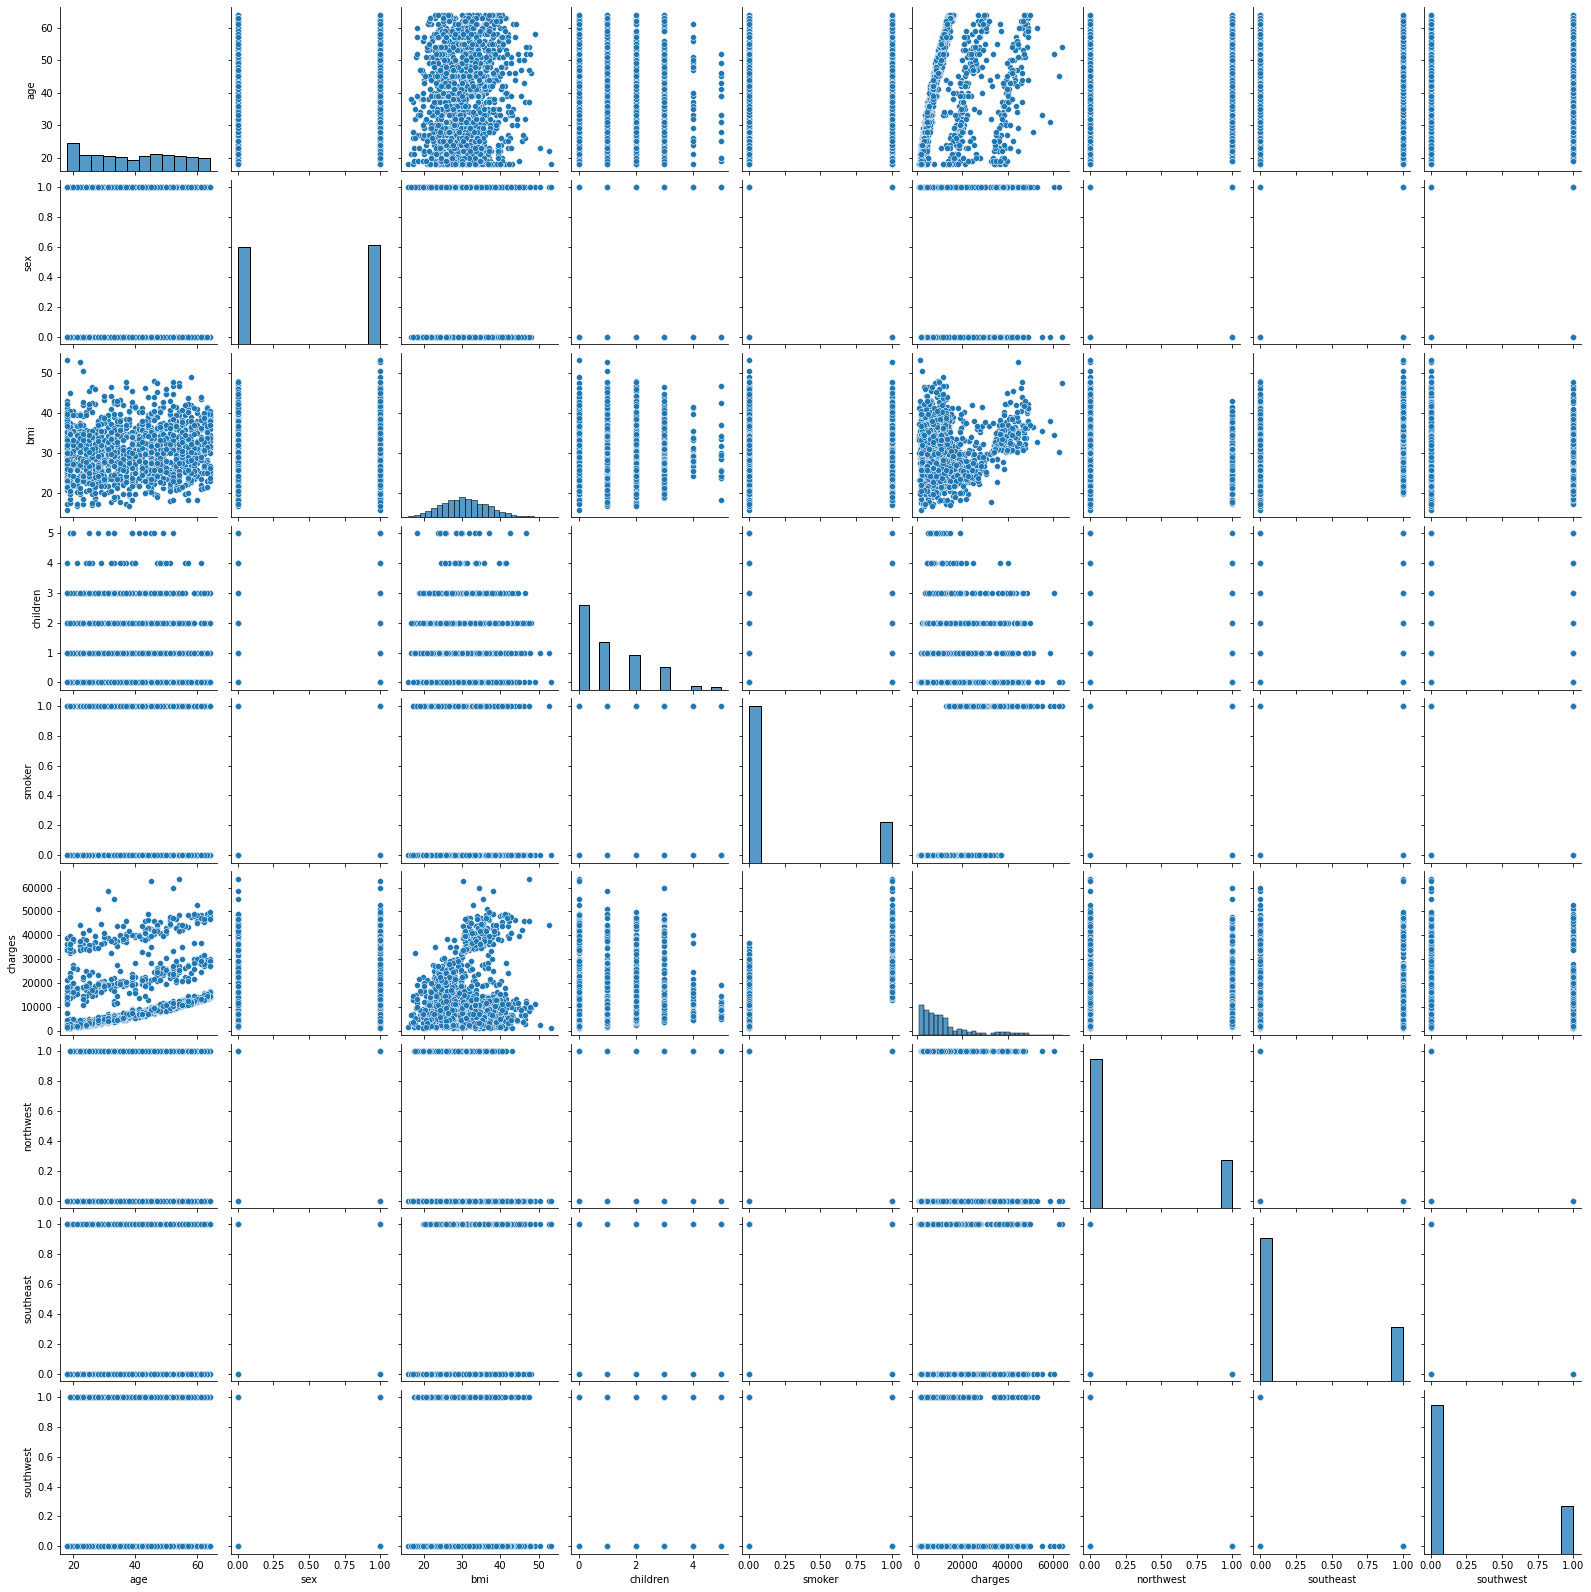

In [18]:
# plot pairplot
sns.pairplot(insurance_df)

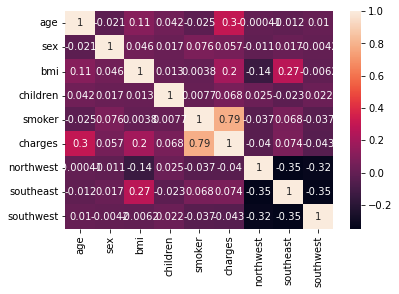

In [19]:
corr_matrix = insurance_df.corr()
sns.heatmap(corr_matrix, annot = True)
plt.show()

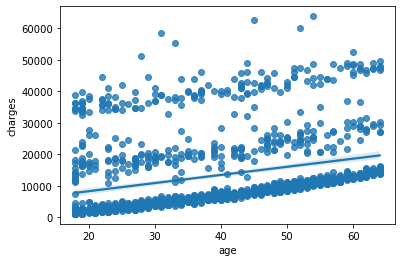

In [20]:
sns.regplot(x = 'age', y = 'charges', data = insurance_df)
plt.show()

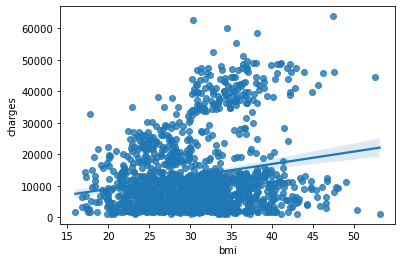

In [21]:
sns.regplot(x = 'bmi', y = 'charges', data = insurance_df)
plt.show()

## 3.  Creating X and y dataset and Train and Test Split

In [22]:
X = insurance_df.drop(columns =['charges'])
y = insurance_df['charges']

In [23]:
X = np.array(X).astype('float32')
y = np.array(y).astype('float32')

In [24]:
y = y.reshape(-1,1)

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)


In [27]:
#scaling the data before feeding the model
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler_x = StandardScaler()
X_train = scaler_x.fit_transform(X_train)
X_test = scaler_x.transform(X_test)

scaler_y = StandardScaler()
y_train = scaler_y.fit_transform(y_train)
y_test = scaler_y.transform(y_test)


## 4.Training Using Linear Regression Model 

In [28]:
# using linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score

regresssion_model_sklearn = LinearRegression()
regresssion_model_sklearn.fit(X_train, y_train)

LinearRegression()

In [29]:
regresssion_model_sklearn_accuracy = regresssion_model_sklearn.score(X_test, y_test)
regresssion_model_sklearn_accuracy

0.7835929599334364

In [30]:
y_predict = regresssion_model_sklearn.predict(X_test)

In [31]:
y_predict_orig = scaler_y.inverse_transform(y_predict)
y_test_orig = scaler_y.inverse_transform(y_test)


In [32]:
insurance_df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges', 'northwest',
       'southeast', 'southwest'],
      dtype='object')

In [33]:
regresssion_model_sklearn.coef_

array([[ 3.0089957e-01, -7.7359495e-04,  1.6948968e-01,  4.3024313e-02,
         7.9561883e-01, -1.3163151e-02, -2.4151927e-02, -2.9058877e-02]],
      dtype=float32)

In [34]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)

In [35]:
print('RMSE =',RMSE, '\nMSE =',MSE)

RMSE = 5796.285 
MSE = 33596916.0


## 5.Training Using Neural Networks

In [41]:
from tensorflow import keras
from keras.layers import Dense, Activation, Dropout, BatchNormalization
from keras.optimizers import Adam
# Import `Sequential` from `keras.models`
from keras.models import Sequential

# Import `Dense` from `keras.layers`
from keras.layers import Dense


In [43]:
# optimizer = Adam()
ANN_model = Sequential()
ANN_model.add(Dense(50, input_shape = (8,)))
ANN_model.add(Activation('relu'))
ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dropout(0.5))
ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dropout(0.5))
ANN_model.add(Dense(50))
ANN_model.add(Activation('linear'))
ANN_model.add(Dense(1))
ANN_model.compile(loss = 'mse', optimizer = 'adam')
ANN_model.summary()




Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 50)                450       
_________________________________________________________________
activation_1 (Activation)    (None, 50)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 150)               7650      
_________________________________________________________________
activation_2 (Activation)    (None, 150)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 150)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 150)               22650     
_________________________________________________________________
activation_3 (Activation)    (None, 150)              

In [44]:
ANN_model.compile(optimizer='Adam', loss='mean_squared_error')

epochs_hist = ANN_model.fit(X_train, y_train, epochs = 100, batch_size = 20, validation_split = 0.2)

Train on 856 samples, validate on 214 samples
Epoch 1/100
856/856 [==============================] - 1s 2ms/step - loss: 0.6795 - val_loss: 0.2612
Epoch 2/100
856/856 [==============================] - 0s 191us/step - loss: 0.3667 - val_loss: 0.2257
Epoch 3/100
856/856 [==============================] - 0s 188us/step - loss: 0.3227 - val_loss: 0.1866
Epoch 4/100
856/856 [==============================] - 0s 195us/step - loss: 0.2850 - val_loss: 0.1805
Epoch 5/100
856/856 [==============================] - 0s 192us/step - loss: 0.2686 - val_loss: 0.2073
Epoch 6/100
856/856 [==============================] - 0s 187us/step - loss: 0.2615 - val_loss: 0.1707
Epoch 7/100
856/856 [==============================] - 0s 192us/step - loss: 0.2558 - val_loss: 0.1816
Epoch 8/100
856/856 [==============================] - 0s 195us/step - loss: 0.2263 - val_loss: 0.1965
Epoch 9/100
856/856 [==============================] - 0s 190us/step - loss: 0.2300 - val_loss: 0.1676
Epoch 10/100
856/856 [=======

856/856 [==============================] - 0s 180us/step - loss: 0.1441 - val_loss: 0.1643
Epoch 80/100
856/856 [==============================] - 0s 177us/step - loss: 0.1426 - val_loss: 0.1601
Epoch 81/100
856/856 [==============================] - 0s 179us/step - loss: 0.1434 - val_loss: 0.1539
Epoch 82/100
856/856 [==============================] - 0s 183us/step - loss: 0.1394 - val_loss: 0.1850
Epoch 83/100
856/856 [==============================] - 0s 179us/step - loss: 0.1508 - val_loss: 0.1646
Epoch 84/100
856/856 [==============================] - 0s 175us/step - loss: 0.1422 - val_loss: 0.1713
Epoch 85/100
856/856 [==============================] - 0s 179us/step - loss: 0.1398 - val_loss: 0.1641
Epoch 86/100
856/856 [==============================] - 0s 181us/step - loss: 0.1409 - val_loss: 0.1670
Epoch 87/100
856/856 [==============================] - 0s 178us/step - loss: 0.1285 - val_loss: 0.1647
Epoch 88/100
856/856 [==============================] - 0s 186us/step - loss:

In [45]:
result = ANN_model.evaluate(X_test, y_test)
accuracy_ANN = 1 - result
print("Accuracy : {}".format(accuracy_ANN))

268/268 [==============================] - 0s 37us/step
Accuracy : 0.8280580464138914


In [46]:
epochs_hist.history.keys()

dict_keys(['val_loss', 'loss'])

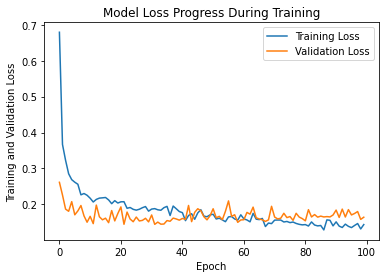

In [47]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training and Validation Loss')
plt.legend(['Training Loss', 'Validation Loss'])

Text(0, 0.5, 'True Values')

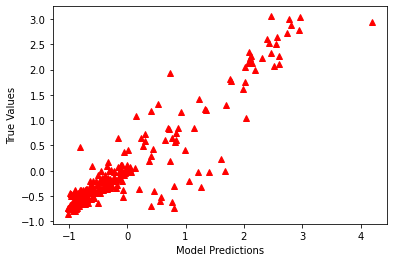

In [48]:
y_predict = ANN_model.predict(X_test)
plt.plot(y_test, y_predict, "^", color = 'r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')


In [49]:

y_predict_orig = scaler_y.inverse_transform(y_predict)
y_test_orig = scaler_y.inverse_transform(y_test)

In [51]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)

print('RMSE =',RMSE, '\nMSE =',MSE) 

RMSE = 4981.667 
MSE = 24817004.0


# Summary :

In Linear Regression accuracy was leass .Accuracy Increased by adding neural Netwrok .
Plot Validation loss and Training loss to understand how well our model is working .
    